In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
original_angles = np.random.rand(2000)
shifter_angles = np.angle(np.exp(1j *( original_angles + 0.5)))

np.angle(np.exp(1j * (original_angles - shifter_angles)))

array([-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5])

In [10]:
n_ensemble = 2000
x_size = 10
y_size = 10
ensemble = np.random.rand(n_ensemble,361,4)
ensemble[:,:,0:2] *= x_size/4
ensemble[:,:,0:2] -= x_size/8
ensemble[:,:,0:2] = np.mod(ensemble[:,:,0:2], 10)
ensemble[:,:,2] = 0.03
ensemble[:,:,3] *= np.pi*2
original_av = np.angle( np.sum( np.exp(1j* ensemble[::,3])))
print(original_av)
#ensemble[:,:,3] = np.pi

ensemble[:,:,3] = np.angle(np.exp(1j* (ensemble[:,:,3] + 0.5)))

0.6680367655525075


-0.8315680597501911

In [1563]:
np.angle(np.sum( np.exp(1j* ensemble[:,:,3])))

-0.510338781735533

In [1564]:
def periodic_distant_vectors(vectors, x_size, y_size):
    
    vectors[:,:,0] = np.where(vectors[:,:,0]>x_size/2,vectors[:,:,0]-x_size,vectors[:,:,0])
    vectors[:,:,0] = np.where(vectors[:,:,0]<-x_size/2,vectors[:,:,0]+x_size,vectors[:,:,0])
    vectors[:,:,1] = np.where(vectors[:,:,1]>y_size/2,vectors[:,:,1]-y_size,vectors[:,:,1])
    vectors[:,:,1] = np.where(vectors[:,:,1]<-y_size/2,vectors[:,:,1]+y_size,vectors[:,:,1])
    
    return vectors

In [1565]:
p1 = ensemble[0,:,:]

dists = ensemble - p1

# apply pbc to dist
dists[:,:,0:2] = periodic_distant_vectors(dists[:,:,0:2], x_size,y_size)

average = p1 + 1/(n_ensemble) * np.sum(dists, axis=0)

average[:,0] = np.mod(average[:,0], x_size)
average[:,1] = np.mod(average[:,1], y_size)
average[:,3] = np.angle(np.sum( np.exp(1j* ensemble[:,:,3]) ,axis=0))


In [1566]:
np.angle(np.sum( np.exp(1j* average[:,3] ) ,axis=0))

-0.02389888455944468

In [1567]:
dists.shape

(2000, 361, 4)

In [1568]:
average.shape

(361, 4)

In [1569]:
simple_av = np.mean(ensemble, axis=0)


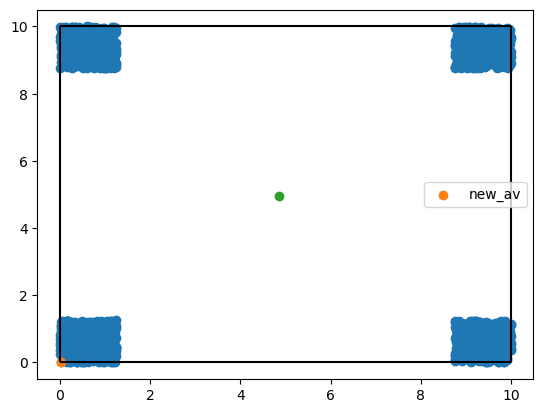

In [1570]:
plt.figure()

plt.vlines([0,x_size], 0, y_size, colors='black')
plt.hlines([0,y_size], 0, x_size, colors='black')
plt.scatter(ensemble[:,0,0],ensemble[:,0,1])
plt.scatter(average[0,0], average[0,1], label="new_av")
plt.scatter(simple_av[0,0], simple_av[0,1])

plt.legend()
plt.show()

In [1571]:
print(average[:,3])

[-2.60624692e+00 -4.02300101e-01 -2.75637225e+00 -2.87334552e+00
 -9.70989918e-01 -2.53678752e-01 -9.70582261e-01 -7.76254897e-01
 -9.29383080e-01  2.75998351e+00 -1.33578185e+00  8.51227032e-01
 -1.68568984e-02  5.32757914e-01  2.70892488e+00 -2.57468756e+00
 -2.81919093e+00  1.76326285e+00  2.01002531e+00 -1.12913667e+00
  4.10813231e-01 -4.23938622e-01 -1.66557473e+00 -2.90697438e+00
  2.40976352e+00  8.13770861e-02 -1.46809396e-01 -3.13150741e+00
  2.26530529e+00 -2.20807925e+00  3.15485523e-01  2.73071320e+00
  1.39389034e+00 -7.61445670e-01 -6.25321945e-01 -1.54486194e-01
  2.63948668e-02  3.06904715e+00 -2.87041677e-01  1.59943385e+00
 -2.79880691e+00  5.15157928e-01 -2.38236444e+00 -3.02644670e-01
  8.29626656e-01 -2.54681241e+00  2.06860093e+00  1.99434715e+00
  3.10212258e+00 -1.82906523e+00 -1.51986950e+00  1.45288674e+00
  2.15460344e+00  2.77761180e+00  1.82639268e+00 -2.72730218e+00
 -1.46137854e+00  2.32552020e+00 -3.02582376e+00 -1.51503700e+00
 -3.11369903e+00  1.00466